# Homework 4 Question 1 (Value Function Iteration)

In [115]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from operator import itemgetter
from mpl_toolkits.mplot3d import Axes3D
import math
from math import exp
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from math import log
plt.style.use("ggplot")

In [116]:
theta = 0.679
beta = 0.988
delta = 0.013
h = 1
k = 1
kappa = 5.24
v = 2.0

## 1 a)

In [117]:
#Labor endogenous
def m(ki, kj):
    d = 100
    kappa = 5.24
    theta = 0.679
    beta = 0.988
    delta = 0.013
    v = 2.0
    h = np.linspace(0.001, 1, d)
    u = np.zeros(d)
    c = 0
#     h_max = 0
#     u_max = -111111
    for i in range(d):
        c = ki**(1-theta)*h[i]**theta+(1-delta)-kj
#         u_max = -1000000
#         h_max = 0
        if c >= 0:
            u[i] = math.log(c) - kappa*(h[i]**(1+1/v)/(1+1/v))
#             if u[i] >= u_max:
#                 h_max = h[i]
#                 u_max = u[i]
        else:
            u[i] = -100000
#         print(h_max)
        
    
    return max(u)

In [113]:
%%time
### Inefficient version
# p = 100, k_max = 2 ====>>> 13sekund
k_min = 0.01
k_max = 2
p = 50

#Step 1
k = np.linspace(k_min, k_max, p) #The continuous variable k is discretized by defining a grid for the values of k

#Step 2
V = []
V.append(np.zeros(p)) #Guess a solution
V.append(np.zeros(p))
k_dec = []
k_dec.append(np.zeros(p))
#ki_dec = []
#ki_dec.append(np.zeros(p))
kj_dec = []
kj_dec.append(np.zeros(p))
#kj_dec.append(np.zeros(p))
#Step 3
#Define the return matrix M

M = [0]*p
Chi = [0]*p
for i in range(p):
    M[i] = [0] * p
    Chi[i] = [0] * p
    
    
for i in range(p):
    for j in range(p):
        M[i][j] = m(k[i], k[j])



for i in range(p):
    for j in range(p):
        Chi[i][j] = M[i][j] + beta* V[-1][j]

#STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
V_new = [0]*p
k_dec_new = [0]*p
for i in range(p):
    V_new[i]=max(Chi[i])
    #k_dec_new[i] = argmax(Chi[i])

V.append(V_new)

#check = True

while (np.linalg.norm(np.asarray(V[-1]) - np.asarray(V[-2])) > 0.01): #STEP 6: If ||Vs+1 − Vs|| < ε, stop and report success. Otherwise, go back to the previous step, STEP 5, replacing s = s + 1.
    #check = False
    #STEP 5.1: Compute the matrix, χ
    for i in range(p):
        for j in range(p):
            Chi[i][j] = M[i][j] + beta* V[-1][j]
    
    #STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
    V_new = [0]*p
    k_dec_new = [0]*p
    for i in range(p):
        V_new[i]=max(Chi[i])
        #k_dec_new[i] = argmax(Chi[i])

    V.append(V_new)
    #k_dec.append(Chi.argmax(1))
    #kj_dec.append(k[k_dec[-1]])

Wall time: 1.35 s


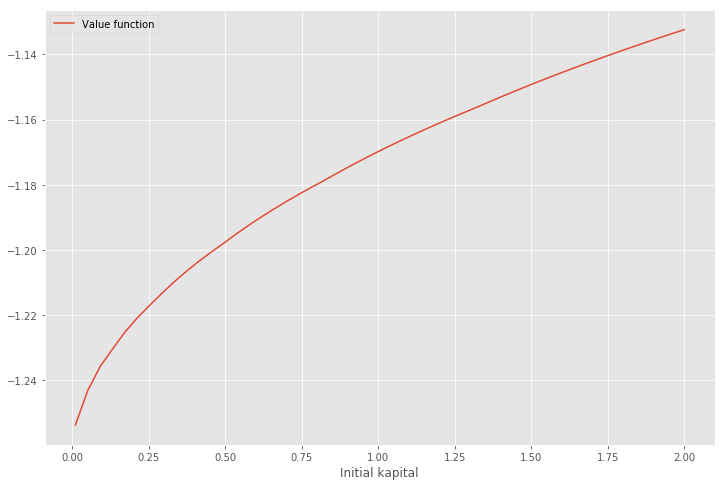

In [114]:
def plot1A():
    plt.plot(k, V[-1], label='Value function')
    plt.legend()
    plt.rcParams["figure.figsize"] = (12,8)
    plt.xlabel('Initial kapital')
    
plot1A()

# 1b) monotonicity

In [94]:
%%time
# p = 100 , k_max = 2 ====>>> 5,5sekund

k_min = 0.01
k_max = 2
p = 50

#Step 1
k = np.linspace(k_min, k_max, p) #The continuous variable k is discretized by defining a grid for the values of k

#Step 2
V = []
V.append(np.zeros(p)) #Guess a solution
V.append(np.zeros(p))
k_dec = []
k_dec.append(np.zeros(p))

kj_dec = []
kj_dec.append(np.zeros(p))


#Step 3
#Define the return matrix M
M = [0]*p
Chi = [0]*p
for i in range(p):
    M[i] = [0] * p
    Chi[i] = [0] * p
    
    
for i in range(p):
    for j in range(p):
        M[i][j] = m(k[i], k[j])



for i in range(p):
    for j in range(p):
        Chi[i][j] = M[i][j] + beta* V[-1][j]

#STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
V_new = [0]*p
k_dec_new = [0]*p
for i in range(p):
    V_new[i]=max(Chi[i])
    #k_dec_new[i] = argmax(Chi[i])

V.append(V_new)

#check = True

while (np.linalg.norm(np.asarray(V[-1]) - np.asarray(V[-2])) > 0.01): #STEP 6: If ||Vs+1 − Vs|| < ε, stop and report success. Otherwise, go back to the previous step, STEP 5, replacing s = s + 1.
    #check = False
    #STEP 5.1: Compute the matrix, χ
    for i in range(p):
        for j in range(p):
            if k[j]>=k_dec[-1][j]:
                Chi[i][j] =M[i][j] + beta* V[-1][j]

    
    #STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
    V_new = [0]*p
    k_dec_new = [0]*p
    for i in range(p):
        V_new[i]=max(Chi[i])
        #k_dec_new[i] = argmax(Chi[i])

    V.append(V_new)
    #k_dec.append(Chi.argmax(1))
    #kj_dec.append(k[k_dec[-1]])

Wall time: 1.34 s


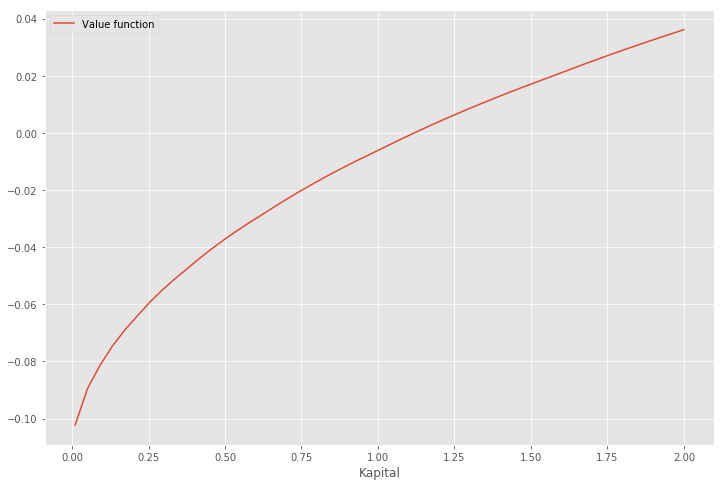

In [110]:
def plot1B():
    plt.plot(k, V[-1], label='Value function')
    plt.legend()
    plt.rcParams["figure.figsize"] = (12,8)
    plt.xlabel('Kapital')
    
plot1B()

# 1 c) concavity

In [99]:
%%time
# p = 100 , k_max = 2 ====>>> 1,4 sekund
Cond = True
k_min = 0.01
k_max = 2
p = 50

#Step 1
k = np.linspace(k_min, k_max, p) #The continuous variable k is discretized by defining a grid for the values of k

#Step 2
V = []
V.append(np.zeros(p)) #Guess a solution
V.append(np.zeros(p))
k_dec = []
k_dec.append(np.zeros(p))

kj_dec = []
kj_dec.append(np.zeros(p))


#Step 3
#Define the return matrix M
M = [0]*p
Chi = [0]*p
for i in range(p):
    M[i] = [0] * p
    Chi[i] = [0] * p
    
    
for i in range(p):
    for j in range(p):
        M[i][j] = m(k[i], k[j])



for i in range(p):
    for j in range(p):
        Chi[i][j] = M[i][j] + beta* V[-1][j]

#STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
V_new = [0]*p
k_dec_new = [0]*p
for i in range(p):
    V_new[i]=max(Chi[i])
    #k_dec_new[i] = argmax(Chi[i])

V.append(V_new)

#check = True

while (np.linalg.norm(np.asarray(V[-1]) - np.asarray(V[-2])) > 0.01): #STEP 6: If ||Vs+1 − Vs|| < ε, stop and report success. Otherwise, go back to the previous step, STEP 5, replacing s = s + 1.
    #check = False
    #STEP 5.1: Compute the matrix, χ
    for i in range(p):
        j=0
        while j<p:
            Chi[i][j] =M[i][j] + beta* V[-1][j]
            if j>0:
                if Chi[i][j]<Chi[i][j-1]:
                    j=p
            j = j+1
            
     
        
    
    #STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
    V_new = [0]*p
    k_dec_new = [0]*p
    for i in range(p):
        V_new[i]=max(Chi[i])
        #k_dec_new[i] = argmax(Chi[i])

    V.append(V_new)
    #k_dec.append(Chi.argmax(1))
    #kj_dec.append(k[k_dec[-1]])

Wall time: 916 ms


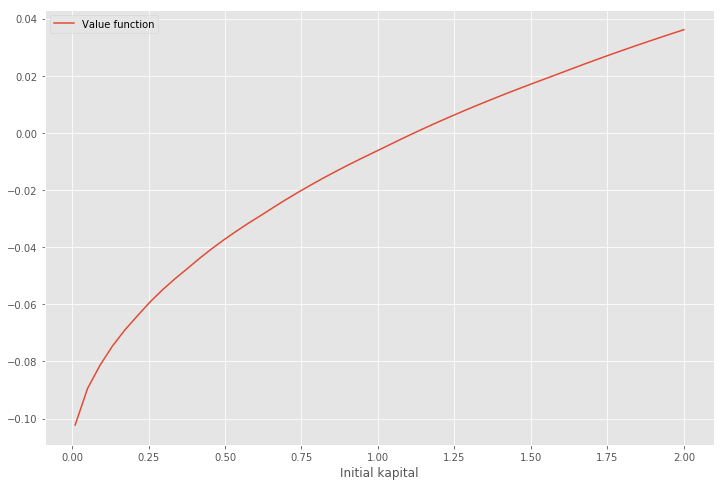

In [100]:
def plot1C():
    plt.plot(k, V[-1], label='Value function')
    plt.legend()
    plt.rcParams["figure.figsize"] = (12,8)
    plt.xlabel('Initial kapital')
    
plot1C()

# 1 d) local search

In [105]:
%%time
# p = 100 , k_max = 2 ====>>> 0,9 sekund
Cond = True
k_min = 0.01
k_max = 2
p = 50

#Step 1
k = np.linspace(k_min, k_max, p) #The continuous variable k is discretized by defining a grid for the values of k

#Step 2
V = []
V.append(np.zeros(p)) #Guess a solution
V.append(np.zeros(p))
k_dec = []
k_dec.append(np.zeros(p))

kj_dec = []
kj_dec.append(np.zeros(p))


#Step 3
#Define the return matrix M
M = [0]*p
Chi = [0]*p
for i in range(p):
    M[i] = [0] * p
    Chi[i] = [0] * p
    
    
for i in range(p):
    for j in range(p):
        M[i][j] = m(k[i], k[j])



for i in range(p):
    for j in range(p):
        Chi[i][j] = M[i][j] + beta* V[-1][j]

#STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
V_new = [0]*p
k_dec_new = [0]*p
for i in range(p):
    V_new[i]=max(Chi[i])
    k_dec_new[i] = Chi[i].index(max(Chi[i]))

V.append(V_new)
k_dec.append(k_dec_new)


while (np.linalg.norm(np.asarray(V[-1]) - np.asarray(V[-2])) > 0.01): #STEP 6: If ||Vs+1 − Vs|| < ε, stop and report success. Otherwise, go back to the previous step, STEP 5, replacing s = s + 1.
    #STEP 5.1: Compute the matrix, χ
    for i in range(p):
        for j in range(k_dec_new[i]-1,k_dec_new[i]+1):
            Chi[i][j] =M[i][j] + beta* V[-1][j]

            
    #STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
    V_new = [0]*p
    k_dec_new = [0]*p
    for i in range(p):
        V_new[i]=max(Chi[i])
        k_dec_new[i] = Chi[i].index(max(Chi[i]))

    V.append(V_new)
    k_dec.append(k_dec_new)
    #kj_dec.append(k[k_dec[-1]])

Wall time: 817 ms


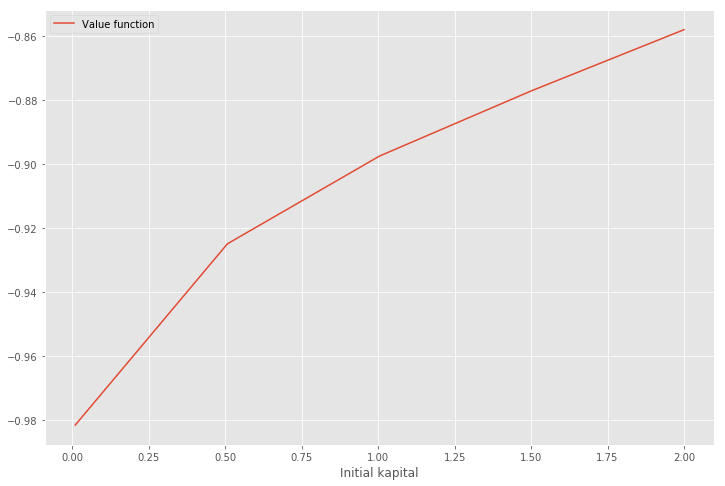

In [102]:
def plot1D():
    plt.plot(k, V[-1], label='Value function')
    plt.legend()
    plt.rcParams["figure.figsize"] = (12,8)
    plt.xlabel('Initial kapital')
    
plot1D()

# 1 e) concavity of the value function and monotonicity of the decision rule

In [109]:
%%time
# p = 100 , k_max = 2 ====>>> 1,5 sekund

k_min = 0.01
k_max = 2
p = 50

#Step 1
k = np.linspace(k_min, k_max, p) #The continuous variable k is discretized by defining a grid for the values of k

#Step 2
V = []
V.append(np.zeros(p)) #Guess a solution
V.append(np.zeros(p))
k_dec = []
k_dec.append(np.zeros(p))

kj_dec = []
kj_dec.append(np.zeros(p))


#Step 3
#Define the return matrix M
M = [0]*p
Chi = [0]*p
for i in range(p):
    M[i] = [0] * p
    Chi[i] = [0] * p
    
    
for i in range(p):
    for j in range(p):
        M[i][j] = m(k[i], k[j])



for i in range(p):
    for j in range(p):
        Chi[i][j] = M[i][j] + beta* V[-1][j]

#STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
V_new = [0]*p
k_dec_new = [0]*p
for i in range(p):
    V_new[i]=max(Chi[i])
    #k_dec_new[i] = argmax(Chi[i])

V.append(V_new)

#check = True

while (np.linalg.norm(np.asarray(V[-1]) - np.asarray(V[-2])) > 0.01): #STEP 6: If ||Vs+1 − Vs|| < ε, stop and report success. Otherwise, go back to the previous step, STEP 5, replacing s = s + 1.
    #check = False
    #STEP 5.1: Compute the matrix, χ
    for i in range(p):
        j=0
        while j<p:
            if k[j]>=k_dec[-1][j]:
                Chi[i][j] =M[i][j] + beta* V[-1][j]
                if j>0:
                    if Chi[i][j]<Chi[i][j-1]:
                        j=p
                j = j+1

    
    #STEP 5.2: Compute the updated value function Vs+1 as the maximum element in each row of χ
    V_new = [0]*p
    k_dec_new = [0]*p
    for i in range(p):
        V_new[i]=max(Chi[i])
        #k_dec_new[i] = argmax(Chi[i])

    V.append(V_new)
    #k_dec.append(Chi.argmax(1))
    #kj_dec.append(k[k_dec[-1]])

Wall time: 891 ms


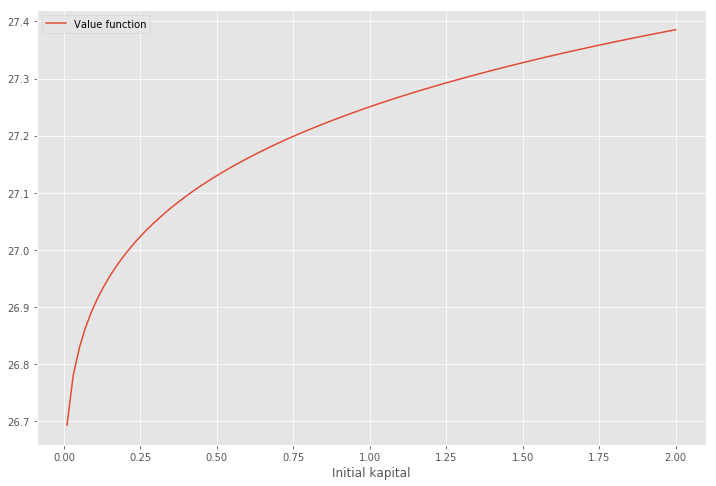

In [86]:
def plot1E():
    plt.plot(k, V[-1], label='Value function')
    plt.legend()
    plt.rcParams["figure.figsize"] = (12,8)
    plt.xlabel('Initial kapital')
    
plot1E()

# Time of execution:
| method\policy iterations | 5| 10 | 20 | 50|
| --- | --- | --- | --- | --- |
| Brut Force | x | x | x | x |
| Monotonicity | x | x | x | x |
| Concavity | x | x | x | x |
| Local Search | x | x | x | x |
| Concavity+Monotonicity | x | x | x | x |